# Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import regex as re
import random
import glob

# Data Preparation

In [20]:
import nltk
#nltk.download('gutenberg')
#nltk.download('punkt')

In [18]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Importing Books downloaded from GutenBerg of Genre: Mystery and detective Fiction of differnt Authors

In [21]:
textFiles = glob.glob('Books/*.txt')

BookLabels = {}
for index, book in enumerate(textFiles):
    BookLabels[chr(65 + index)] = re.split(r"Books\\", book)[-1]
    
BookLabels

{'A': 'Books/The Last Stroke.txt',
 'B': 'Books/The Red House Mystery.txt',
 'C': 'Books/The Mysterious Affairs at Styles.txt',
 'D': 'Books/Arsene Lupin.txt',
 'E': 'Books/Adventures of Sherlock Holmes.txt'}

In [22]:
np.random.seed(42)

labeledDocs = []
for index, filepath in enumerate(textFiles):
    # For each filepath in the list
    file = open(filepath, 'r',  encoding="utf8")
    text = file.read().replace('\n', ' ')
    file.close
    
    allSentenses = nltk.sent_tokenize(text)
    allWords = nltk.word_tokenize(text)
    allLabeledsDocs = []
    record = ''
    for sentence in allSentenses:
        record += ' ' + sentence
        if (len(nltk.word_tokenize(record)) >= 100):
            allLabeledsDocs.append([record,chr(65 + index)])
            record = '' # Empty the reocord
    # Check no of records with atleast 100 words in them
    # print(book,len(allLabeledDocs))
    if(len(allLabeledsDocs) > 200):
        labeledDocs += random.sample(allLabeledsDocs,200)
    

In [23]:
len(labeledDocs)

1000

# Distribution of no of words per record with full sentenses.

<AxesSubplot:xlabel='recordNum', ylabel='wordCount'>

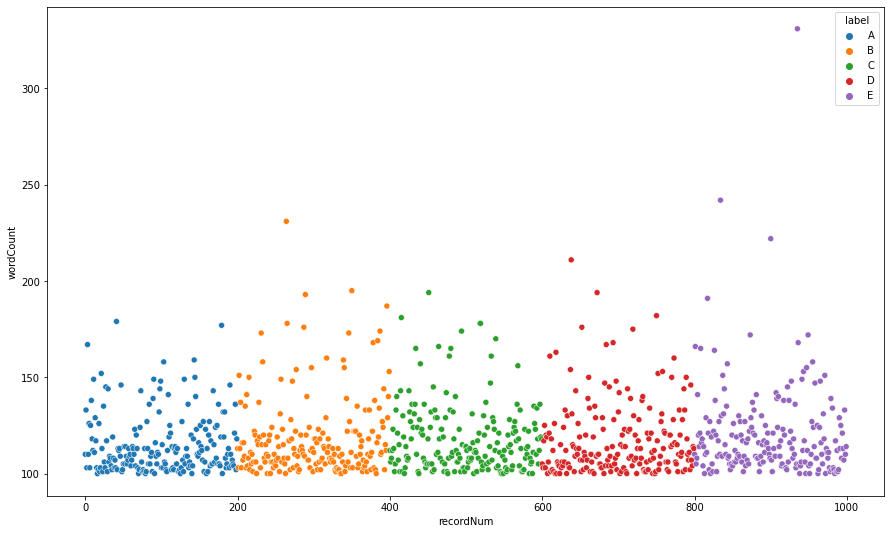

In [24]:
x,y,label =[],[],[]
for index, doc in enumerate(labeledDocs):
    x.append(index)
    y.append(len(nltk.word_tokenize(doc[0])))
    label.append(doc[1])

tempdf = pd.DataFrame({'recordNum':x, 'wordCount':y, 'label':label})

plt.figure(figsize=(15,9))
sns.scatterplot(x ='recordNum', y = 'wordCount', hue = 'label', data = tempdf)

# plt.figure(figsize=(15,9))
# sns.distplot(y, kde = True)

# Creating DataFrame

In [25]:
df = pd.DataFrame(labeledDocs,columns =['text','label'])
df.head()

,text,label
0,CHAPTER XXV. THE LAST STROKE. As the solicito...,A
1,"""The pretty widow? Mr. Ferrars, pardon me, yo...",A
2,"""One naturally would in your place."" ""Yes, I ...",A
3,"In short, he could throw no light upon the my...",A
4,"We'll hear what Miss Grant has to say."" Miss ...",A


# Preprocessing the Data

In [26]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

def textfilter(text):
    nopuncText = removePunctuations(text)
    filteredWords = [word for word in nltk.word_tokenize(nopuncText) if not word in stopwords.words()]
    return re.sub(r"\b\d+\b","",(" ".join(filteredWords)))
def removePunctuations(text):
    return re.sub(r'[^\w\s]','',text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ganapathyp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
print('##############Before removing stop Words\n'+df.text[0])

df.text = df['text'].apply(textfilter)

print('\n##############After removing stop words\n'+df.text[0])

##############Before removing stop Words
 CHAPTER XXV. THE LAST STROKE. As the solicitor turned toward the newcomer, the man and woman exchanged glances, and while he was still confident, not to say defiant, he looked to the unobservant solicitor with a nervous, apprehensive glance, and leaning toward her would have whispered a word of his anxiety; but she shook her head, and the next moment the solicitor was naming them to each other and, as Mr. Myers paused before the lady, continued with the utmost directness--  "Mr. Myers, this lady denies the existence of any and all American heirs.

##############After removing stop words
CHAPTER XXV THE LAST STROKE As solicitor turned toward newcomer woman exchanged glances still confident say defiant looked unobservant solicitor nervous apprehensive glance leaning toward would whispered word anxiety shook head next moment solicitor naming Mr Myers paused lady continued utmost directness Mr Myers lady denies existence American heirs


In [28]:
df.to_csv('filteredRecords.csv', index=False)

In [29]:
def countWords(text):
    return len(nltk.word_tokenize(text))

<AxesSubplot:ylabel='count'>

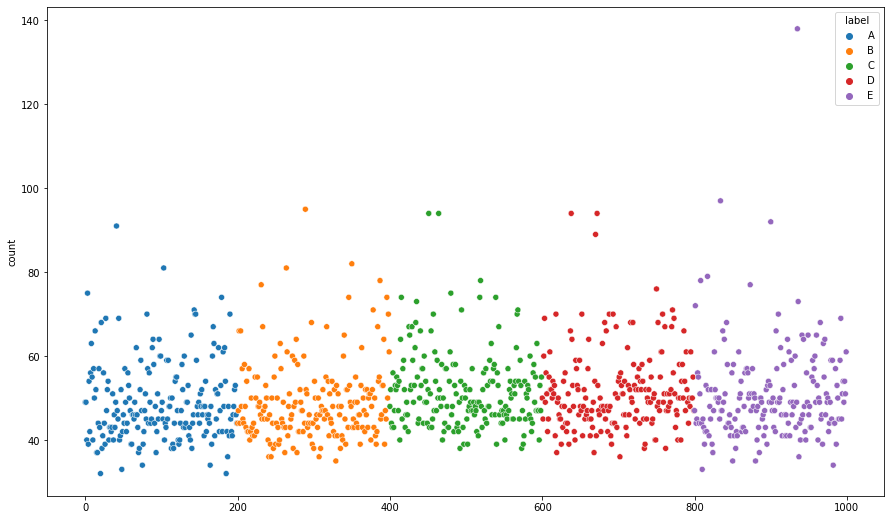

In [30]:
df['count'] = df['text'].apply(countWords)

plt.figure(figsize=(15,9))
sns.scatterplot(x =df.index, y = 'count', hue = 'label', data = df)


In [31]:
df.value_counts('label')

label
A    200
B    200
C    200
D    200
E    200
dtype: int64